In [0]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

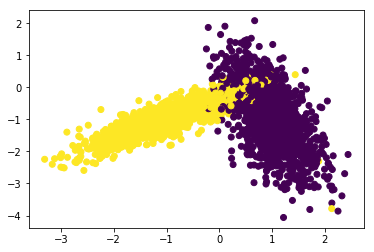

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

In [0]:
# it will take classifier and set of values for hyper prameter in dict type dict({hyper parmeter: [list of values]})
# we are implementing this only for KNN, the hyper parameter should n_neighbors
from sklearn.metrics import accuracy_score

def randomly_select_group(x_train,folds,m):
    #to create groups based n x_train length
    group=[]
    n=0
    p=m
    for i in range(folds):
        rb=[n,m]
        n=m+1
        m=m+p
        group.append(rb)
    #print(group)    
    
    return group
         

def RandomSearch(x_train,y_train,classifier, params, folds):
    trainscores = []
    testscores  = []    
    for k in tqdm(params['n_neighbors']):
        trainscores_folds = []
        testscores_folds  = []
        
        m=len(x_train)/folds
        group=randomly_select_group(x_train,folds,m)
        #to create list; if fold=3 create train_li=list[[1,2][2,3][1,3]]
        #and to create test list=[[3],[1],[2]]
        a=[]
        b=[]
        al=[]
        test=[]
        train=[]
        d=[]
        train_li=[]
        for j in range(1,folds+1):
            al.append(j)
       #print(al)
        for i in range(1,folds+1):
            s=[i]
            b=set(al)-set(s)
            test.append(s)
            train.append(b)
        #print(test)
        #print("\n")
        #print(train)
        for i in range(len(train)):
            d=list(train[i])
            train_li.append(d)
        #print(train_li)#converting set into list
        i=0
        #to select specific range from train_li and corresponding index range in group
        for j in range(0, folds):
            
            ranges=[]
            
            for h in range(len(train_li[i])):
                #print(h)
                u=train_li[i][h]                      
                g=int(group[u-1][0])
                p=int(group[u-1][1])
                #print(g)
                #print(p)
                ranges=ranges+list(range(g,p))
            i=i+1
            #print(ranges)
            train_indices =ranges
            #print(train_indices)
            u=set(range(0,len(x_train))) - set(train_indices)
            test_indices  = list(set(range(0,len(x_train))) - set(train_indices))
            #print(u)   
            # slecting the data points based on the train_indices and test_indices
            X_train = x_train[train_indices]
            #print(X_train)
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]
            classifier.n_neighbors = k
            #print(k)
            classifier.fit(X_train,Y_train)
            Y_predicted = classifier.predict(X_test)
            #print(Y_predicted)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))
            Y_predicted = classifier.predict(X_train)
            #print(Y_predicted)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores

enter the number of folds3


100%|██████████| 11/11 [00:10<00:00,  1.05s/it]


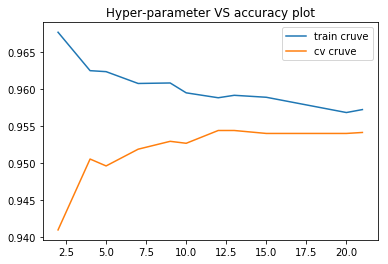

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

param_range=[]
neigh = KNeighborsClassifier()
#to create uniform random numbers without repetation
for i in range(11):
    o=int(numpy.random.uniform(1,25))
    if o not in param_range:param_range.append(o)
#sorting unformly genertated random numbers
param_range=sorted(param_range)

#params = {'n_neighbors':[3,5,7,9,11,13,15,17,19,21,23]}
params = {'n_neighbors':param_range}
#print(params)

folds=int(input("enter the number of folds"))

trainscores,cvscores = RandomSearch(X_train, y_train, neigh, params, folds)

#print(trainscores)
#print(cvscores)

hyper=cvscores.index(max(cvscores))
#print(hyper)
#print(param_range[hyper])
    
plt.plot(params['n_neighbors'],trainscores, label='train cruve')
plt.plot(params['n_neighbors'],cvscores, label='cv cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [0]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

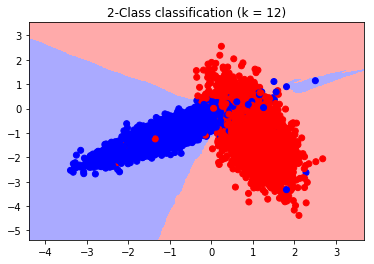

In [0]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = param_range[hyper])
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)